# Statistische Motivation für Regressionsverfahren

Für Datengetriebene automatisierte Entscheidungen wollen wir Modelle zur Vorhersage erstellen. Hierzu verweden wir Ansätze aus der Statistik, um das Vorgehen zu motivieren.

Wir bezeichenen $X \in \mathbb{R}^p$ als einen $p$-dimensionalen Zufalls-Eingabe-Vector und $Y \in \mathbb{R}$ als einen reellwertigen Zufalls-Ausgabe-Vektor mit einer bivariaten Verteilung $Pr(X,Y)$. Mit Hilfe von der Eingabe $X$ wollen wir Ausgabevektor $Y$ vorhesagen. Für diese Vorhersage suchen wir eine Funktion $f(X): \mathbb{R}^p \Rightarrow \mathbb{R}$. Um die Vorhersage zu bewerten benötigen wir ein Fehlermaß $L(Y,f(X))$.

Ein oft verwendetes Fehlermaß ist der quadratische Fehler $L(Y,f(x)) = (Y-f(x))^2$.

Von diesem Fehlermaß lässt sich das Kriterium für die Wahl einer geeigneten Funktion $f(X)$ ableiten, der Erwartungswert des quadratischen Vohersagefehlers:

$$ EPE(f) = E(Y-f(X))^2 $$

Mathematisch lässt sich zeigen das die Regressionsfunktion 

$$ f(X) = E(Y|X=x)$$

den Erwartungswert des Fehlers minimiert.

*Mit anderen Worten, eine Funktion die die Mittelwerte für alle x annimmt wäre ein guter Schätzer. In der Regel haben wir jedoch nicht aureichend Daten um einen stabilen Mittelwert zu berechnen.*

Das K-Neighbors-Regression verfahren nimmt das Obenstehende als Grundlage und versucht dies direkt umzusetzen. Jedoch wird anstatt sich auf die Stelle x zu beschränken eine Nachbarschaft von x für die Berechnung des Mittelwertes herangenommen. 

## K-Neightbors-Regression

Ein Beispiel für die KN-Regression am Beispiel von Werte von Häusern in Kalifornien

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv("../../data/housing/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


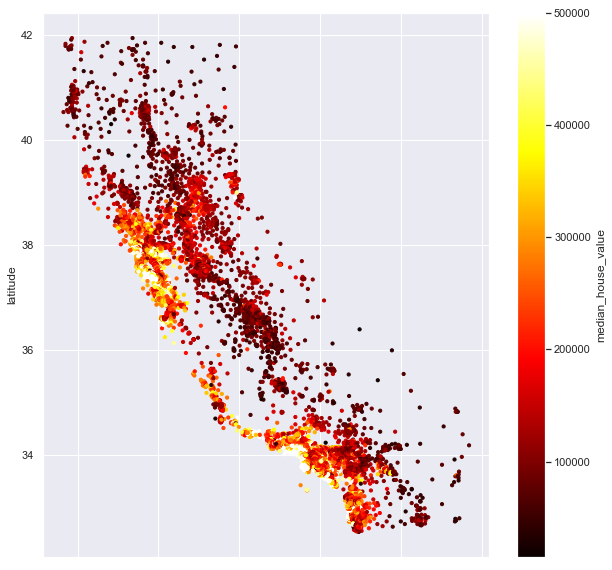

In [3]:
data.plot.scatter(x='longitude', y='latitude', c='median_house_value', s=10, cmap='hot', figsize=(10,10));

Nehmen wir nur die Ortskoordinaten als Eingabe $X$ für das KNR-Modell und den 'median_house_value' als Ausgabevariable $Y$, können wir durch Anpassen des Parameters $k$ sehen wie eine größer Wahl der Nachbarschaft ein Glättung des 'Bildes' entspricht. 

In [4]:
k = 2000

knr = KNeighborsRegressor(n_neighbors=k, weights='uniform')
knr.fit(data[['longitude','latitude']], data['median_house_value'])
data['predicted_value'] = knr.predict(data[['longitude','latitude']])

knr_1 = KNeighborsRegressor(n_neighbors=1, weights='uniform')
knr_1.fit(data[['longitude','latitude']], data['median_house_value'])
data['predicted_value_1'] = knr_1.predict(data[['longitude','latitude']])

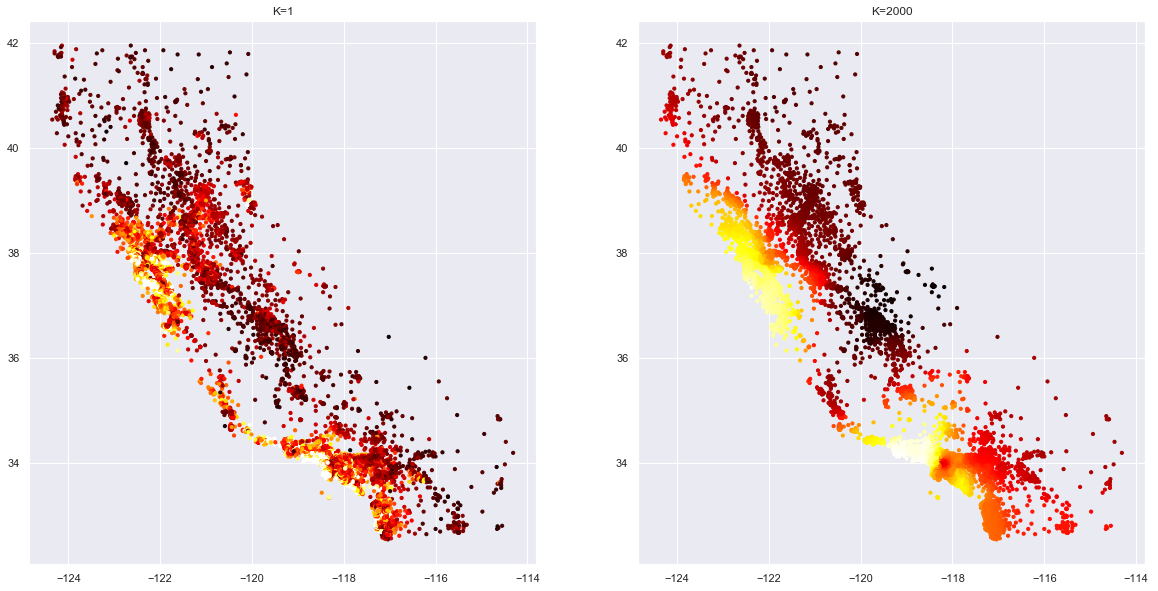

In [5]:
fig = plt.figure(figsize=(20,10))
sub1 = plt.subplot(1,2,1)
sub1.set_title('K=1')
plt.scatter(x=data['longitude'], y=data['latitude'], c=data['predicted_value_1'], s=10, cmap='hot');

sub2=plt.subplot(1,2,2)
sub2.set_title('K=' + str(k))
plt.scatter(x=data['longitude'], y=data['latitude'], c=data['predicted_value'], s=10, cmap='hot');

**Bleiben die Fragen:** 
- Warum schauen wir uns noch andere Verfahren an?
- Wieso wählen wir nicht k=1?